## Library Imports

In this cell, we import essential libraries for both classical and quantum computing aspects of our K-Nearest Neighbors (KNN) classifier. 

- **Classical Computing Libraries**: 
  - `numpy` for numerical operations.
  - `pandas` for data manipulation and analysis.
  - `seaborn` for data visualization.
  - `statistics` to compute the mode, used in the KNN algorithm.
  - `sklearn` for dataset handling and preprocessing tools.

- **Quantum Computing Libraries (Qiskit)**: 
  - `QuantumCircuit`, `QuantumRegister`, `ClassicalRegister` for building quantum circuits.
  - `Aer` and `execute` for running quantum simulations.
  - `plot_histogram` for visualizing quantum measurements.
  - `Statevector` for quantum state representation and manipulation.

This foundational setup ensures we have all the tools required for implementing and analyzing a Quantum KNN classifier.

In [7]:
# Classical computing modules
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mode
# Dataset
from sklearn import datasets, preprocessing 
from sklearn.model_selection import train_test_split
# Quantum computing modules
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

%matplotlib widget


## Dataset Loading and Initial Exploration

In this cell, we initiate our project by loading the Iris dataset, a classic in the field of machine learning, known for its simplicity and effectiveness in classification tasks.

- **Load the Dataset**: 
  - We use `datasets.load_iris()` from `sklearn` to load the Iris dataset.
  - `feature_labels` and `class_labels` are extracted to understand the dataset's features and classes.

- **Dataset Extraction**:
  - `X` represents the feature data of the Iris dataset.
  - `y` holds the target labels (classes) of the dataset.
  - `M` is set to 4, representing the number of features in the dataset.

- **Initial Data Inspection**:
  - We print `feature_labels` and `class_labels` to get an initial understanding of the dataset's structure, which includes features like petal length, petal width, etc., and classes such as Setosa, Versicolor, and Virginica.

This step is crucial as it sets the stage for further data processing and prepares us for the application of both classical and quantum machine learning techniques.

In [5]:
# Load the dataset
iris = datasets.load_iris()
feature_labels = iris.feature_names
class_labels = iris.target_names

# Extract the data
X = iris.data
y = np.array([iris.target])
M = 4

# Print the features and classes
print("Features: ", feature_labels)
print("Classes: ", class_labels)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes:  ['setosa' 'versicolor' 'virginica']


## Data Visualization with Pair Plot

After loading the Iris dataset, this cell emphasizes data visualization, which is essential for understanding feature relationships and distribution.

- **DataFrame Creation**:
  - We create a DataFrame `df` using `pandas`.
  - The DataFrame combines feature data (`X`) and target labels (`y`) for a holistic view.
  - Columns are named using `feature_labels` and "Species" for easy reference.

- **Pair Plot Visualization**:
  - Utilizing `seaborn`'s `pairplot`, we visualize pairwise relationships in the dataset.
  - The `hue` parameter is set to 'Species', allowing us to distinguish data points by their class.
  - This visualization aids in identifying patterns, correlations, and feature separability among different species.

This visual exploration is a key step in preliminary data analysis, offering insights that guide our approach to building the KNN classifier, both in its classical and quantum forms.

/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:111

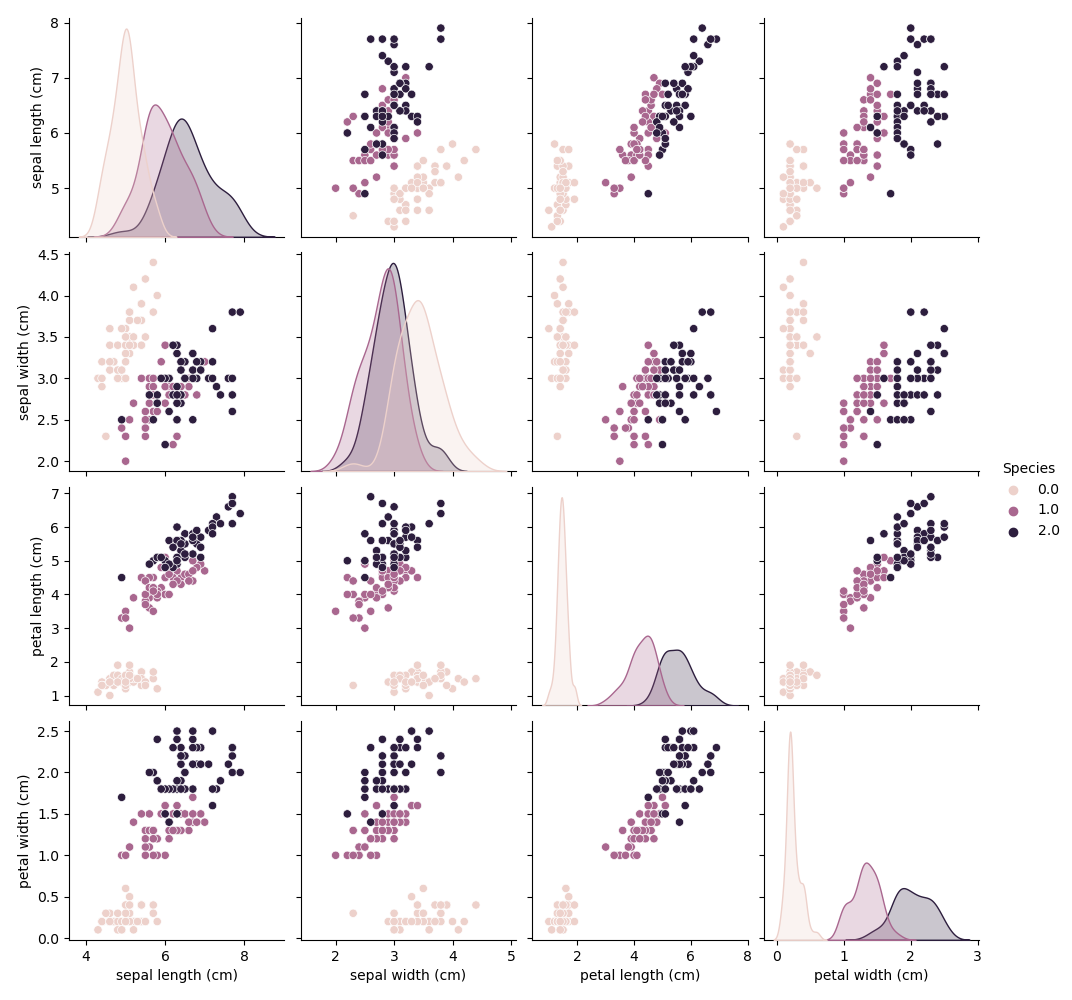

In [8]:
df = pd.DataFrame(data = np.concatenate((X, y.T), axis = 1), columns = feature_labels[0:M] + ["Species"])
sns.pairplot(df, hue = 'Species')

## Data Normalization

This cell introduces data normalization, a crucial step in preparing our dataset for the K-Nearest Neighbors classifier, especially when it involves quantum computing elements.

- **Min-Max Scaler Initialization**:
  - We initialize a `MinMaxScaler` from `sklearn.preprocessing`.
  - The scaler is set to normalize feature values within the range `[0, 1]`.

- **Fitting and Transforming the Dataset**:
  - The scaler is then fitted to our feature dataset `X` to learn the min and max values.
  - `X_normalized` is created by transforming `X` using the fitted scaler.

Normalization ensures that all features contribute equally to the distance calculations in the KNN algorithm, which is essential for its effective functioning. This is particularly important in quantum computing, where feature representation can significantly influence the algorithm's performance.

In [9]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X)
X_normalized = min_max_scaler.transform(X)

## Visualization of Normalized Data

Building upon the earlier visualization steps, this cell aims to visualize the normalized data, providing a comparative perspective with the pre-normalized data.

- **Normalized DataFrame Creation**:
  - A new DataFrame `df2` is created using `pandas`.
  - This DataFrame combines the normalized feature data (`X_normalized`) with the target labels (`y`).
  - Column names are set using `feature_labels` and "Species" for consistency and ease of understanding.

- **Pair Plot of Normalized Data**:
  - We again use `seaborn`'s `pairplot` for visualization.
  - The `hue` parameter remains set to 'Species', facilitating class differentiation.
  - This visualization allows us to observe the effect of normalization on the dataset, particularly how it impacts the distribution and relationships between features.

Visualizing the normalized data is a key analytical step, offering insights into the data's structure post-normalization and ensuring that our preprocessing steps align with the requirements of a robust KNN classifier.

/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gabriel/miniconda/envs/aws_braket_updated/lib/python3.12/site-packages/seaborn/_oldcore.py:111

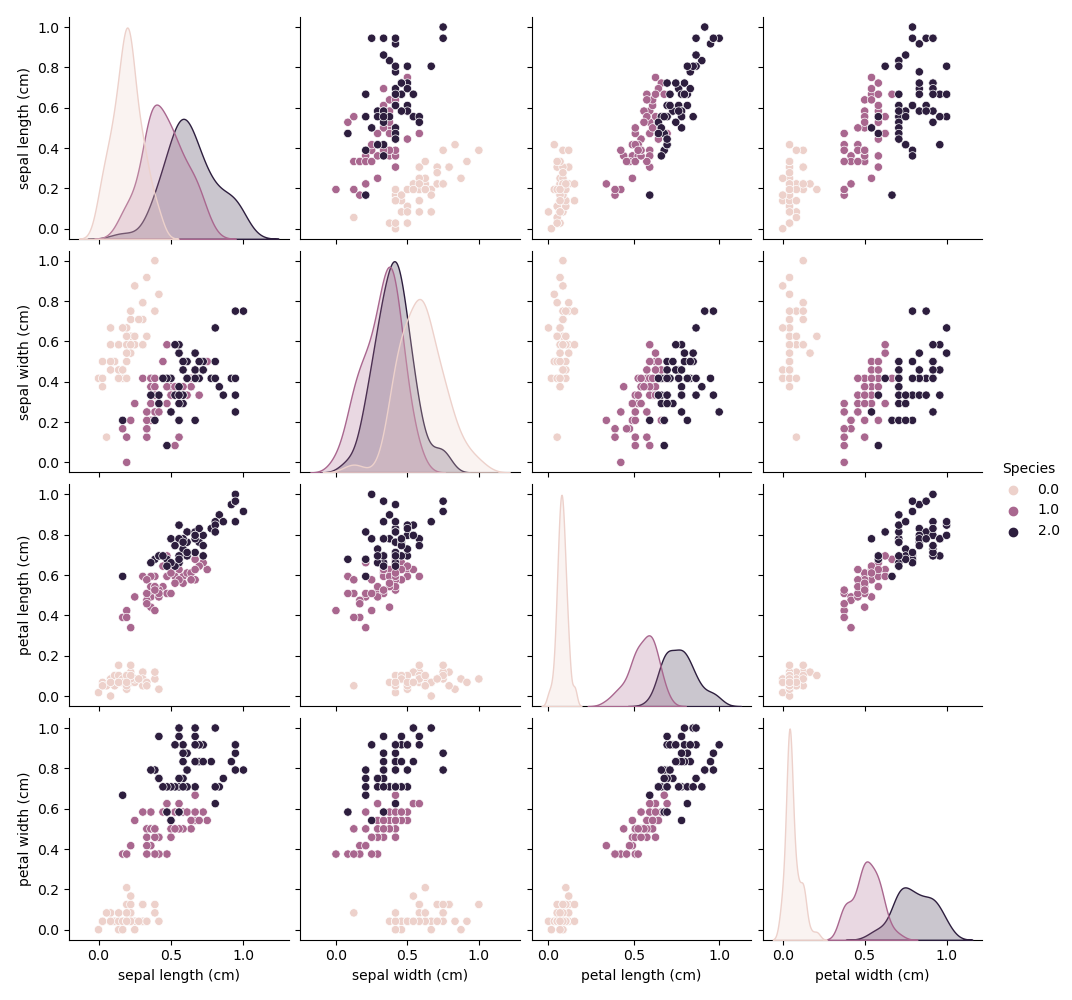

In [10]:
df2 = pd.DataFrame(data = np.concatenate((X_normalized, y.T), axis = 1), columns = feature_labels[0:M] + ["Species"])
sns.pairplot(df2, hue = 'Species')

## Splitting the Dataset into Training and Testing Sets

This cell is dedicated to dividing our normalized dataset into distinct training and testing sets, a standard practice in machine learning to evaluate the model's performance.

- **Setting the Training Dataset Size**:
  - We define `N_train` as 100, indicating the number of samples to include in the training set.

- **Train-Test Split**:
  - The `train_test_split` function from `sklearn.model_selection` is used.
  - `X_normalized` (feature data) and `y` (target labels) are split into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets.
  - The `train_size` parameter is set to `N_train` to specify the size of the training set.

This step is crucial in creating a robust machine learning model, as it provides us with a separate dataset (the testing set) to evaluate the model's performance and generalizability beyond the data it was trained on.

In [11]:
N_train = 100 # Training dataset size

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y[0], train_size=N_train)

## Test Sample Selection and Quantum State Preparation

This cell plays a pivotal role in our Quantum KNN classifier, focusing on selecting a test sample and encoding it as a quantum state vector.

- **Selecting a Test Sample**:
  - We randomly select a test sample index (`test_index`) from the `X_test` dataset.
  - `phi_test` is then assigned the feature values of this selected test sample.

- **Quantum State Encoding**:
  - We encode the test sample features (`phi_test`) into a quantum state.
  - For each feature `i` in `phi_test`, we create a state `phi_i` representing the amplitude probabilities, ensuring they sum up to 1.
  - The states `phi_i` are then combined using the Kronecker product to form the complete quantum state `phi`.

- **Statevector Validation**:
  - We use Qiskit’s `Statevector` to validate `phi` ensuring it represents a valid quantum state.
  - The `is_valid()` function checks if the statevector `phi` is normalized and hence a legitimate state in quantum mechanics.

This step is essential in quantum machine learning, as it translates classical data into a quantum form, enabling us to apply quantum algorithms for tasks like classification.

In [12]:
test_index = int(np.random.rand()*len(X_test)) 
phi_test = X_test[test_index]

print(phi_test)

In [7]:
# Select a sample test sample for classification
test_index = int(np.random.rand()*len(X_test)) 
phi_test = X_test[test_index]

# Create the encoded feature vector
for i in range(M):
    phi_i = [np.sqrt(phi_test[i]), np.sqrt(1- phi_test[i])]
    if i == 0:
        phi = phi_i
    else:
        phi = np.kron(phi_i, phi)    

# Validate the statevector
print('Valid statevector: ', Statevector(phi).is_valid())

Valid statevector:  True


## Construction of Quantum State for Training Data

In this cell, we undertake a crucial step in quantum machine learning: constructing a quantum state that encodes our training dataset.

- **Determining the Quantum Register Size**:
  - `N` is calculated as the ceiling of the logarithm base 2 of the training dataset size (`N_train`), determining the size of the quantum register needed.

- **Initializing the Quantum State `psi`**:
  - We initialize `psi` as a zero vector of size `2^(M + N)` to accommodate all training data points and features.

- **Encoding Training Data into Quantum States**:
  - For each training data point `i`, we perform the following:
    - Encode the index `|i>` into a quantum state `i_vec`.
    - Encode the feature vector `x` (from `X_train[i, :]`) into a quantum state `x_vec` using the amplitude encoding scheme.
    - Combine `x_vec` and `i_vec` using the Kronecker product to form `psi_i`.
    - Add `psi_i` to `psi`.
  - Normalize `psi` by dividing it by the square root of `N_train`.

- **Statevector Validation**:
  - We assert the validity of `psi` using Qiskit's `Statevector` class, ensuring it is a square-normalized quantum state.

This step is fundamental in quantum computing as it transforms classical data into a quantum format, enabling the application of quantum algorithms for the classification task.

In [8]:
N = int(np.ceil(np.log2(N_train)))
psi = np.zeros(2**(M + N)) # Task 9

for i in range(N_train):
    # Encode |i>
    i_vec = np.zeros(2**N)
    i_vec[i] = 1

    # Encode |x>
    x = X_train[i, :]
    for j in range(M):
        dummy = [np.sqrt(x[j]), np.sqrt(1- x[j])]
        if j == 0:
            x_vec = dummy
        else:
            x_vec = np.kron(dummy, x_vec)
    psi_i = np.kron(x_vec, i_vec)
    # Task 9
    psi += psi_i
psi /= np.sqrt(N_train)

# Check the validity of the statevector
assert Statevector(psi).is_valid(), "The statevector is not square-normalized."

## Setting Up Quantum Registers for KNN Classifier

In this cell, we establish the quantum registers required for implementing the Quantum KNN classifier, laying the groundwork for constructing the quantum circuit.

- **Index Register (`index_reg`)**:
  - A quantum register of size `N` (calculated previously) is created and named 'i'.
  - This register is used to encode the indices of the training data points.

- **Training Register (`train_reg`)**:
  - A quantum register of size `M` (number of features) is created and named 'train'.
  - It serves to hold the quantum state representation of the training data features.

- **Test Register (`test_reg`)**:
  - Another quantum register of size `M`, named 'test', is established.
  - This register will encode the quantum state of the test data feature vector.

- **Similarity Register (`p`)**:
  - A single qubit register is created, named 'similarity'.
  - This qubit will be used to measure the similarity between test and training data points in the quantum circuit.

Setting up these quantum registers is a critical step in preparing for the quantum circuit that will perform the KNN classification. Each register plays a specific role in the process, enabling the encoding of both training and test data, as well as the calculation of their similarities.

In [9]:
index_reg = QuantumRegister(N, 'i')
train_reg = QuantumRegister(M, 'train')
test_reg = QuantumRegister(M, 'test')
p = QuantumRegister(1, 'similarity')

## Creation of the Quantum Circuit for KNN Classifier

This cell marks a significant step in our Quantum KNN project: the creation and initial visualization of the quantum circuit.

- **Quantum Circuit Initialization**:
  - We initialize an empty Quantum Circuit, named `qknn`.

- **Adding Registers to the Circuit**:
  - The previously defined quantum registers `index_reg`, `train_reg`, `test_reg`, and `p` are added to `qknn`.
  - `index_reg` is for indexing the training data.
  - `train_reg` and `test_reg` are for encoding the training and test data features, respectively.
  - `p` is the similarity register used in similarity measurement.

- **Circuit Visualization**:
  - The circuit is visualized using Qiskit’s `draw` method with the 'mpl' (Matplotlib) style.
  - This visualization provides an overview of the quantum circuit’s structure and the registers it comprises.

Constructing and visualizing the quantum circuit is a crucial stage. It lays out the foundation on which the quantum algorithm for the KNN classifier will be built and operated.

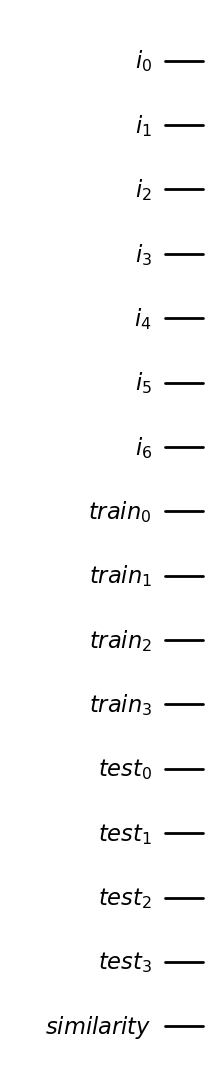

In [10]:
# Create the quantum circuit
qknn = QuantumCircuit()

# Add registers to the circuit
qknn.add_register(index_reg)
qknn.add_register(train_reg)
qknn.add_register(test_reg)
qknn.add_register(p)

# Draw the quantum circuit
qknn.draw('mpl') 

## Initializing Quantum Registers in the Circuit

This cell is dedicated to initializing the quantum registers in our KNN quantum circuit, a crucial step in preparing the circuit for the classification process.

- **Initializing the Training Register**:
  - The `initialize` method is used to set the `index_reg` and `train_reg` registers with the quantum state `psi`.
  - `psi` represents the encoded training dataset, as previously constructed.
  - The state is applied to the first `N` qubits of `index_reg` and the first `M` qubits of `train_reg`.

- **Initializing the Test Register**:
  - Similarly, the `initialize` method is used to set the `test_reg` register with the quantum state `phi`.
  - `phi` is the encoded state of the selected test sample.

- **Circuit Visualization (Post-Initialization)**:
  - After initialization, the quantum circuit `qknn` is visualized again using the 'mpl' style.
  - This visualization helps to confirm that the registers are correctly initialized with the respective quantum states.

Initializing the quantum registers with the encoded training and test data is vital for the Quantum KNN classifier, as it prepares the circuit for executing the quantum algorithm that will perform the classification task.

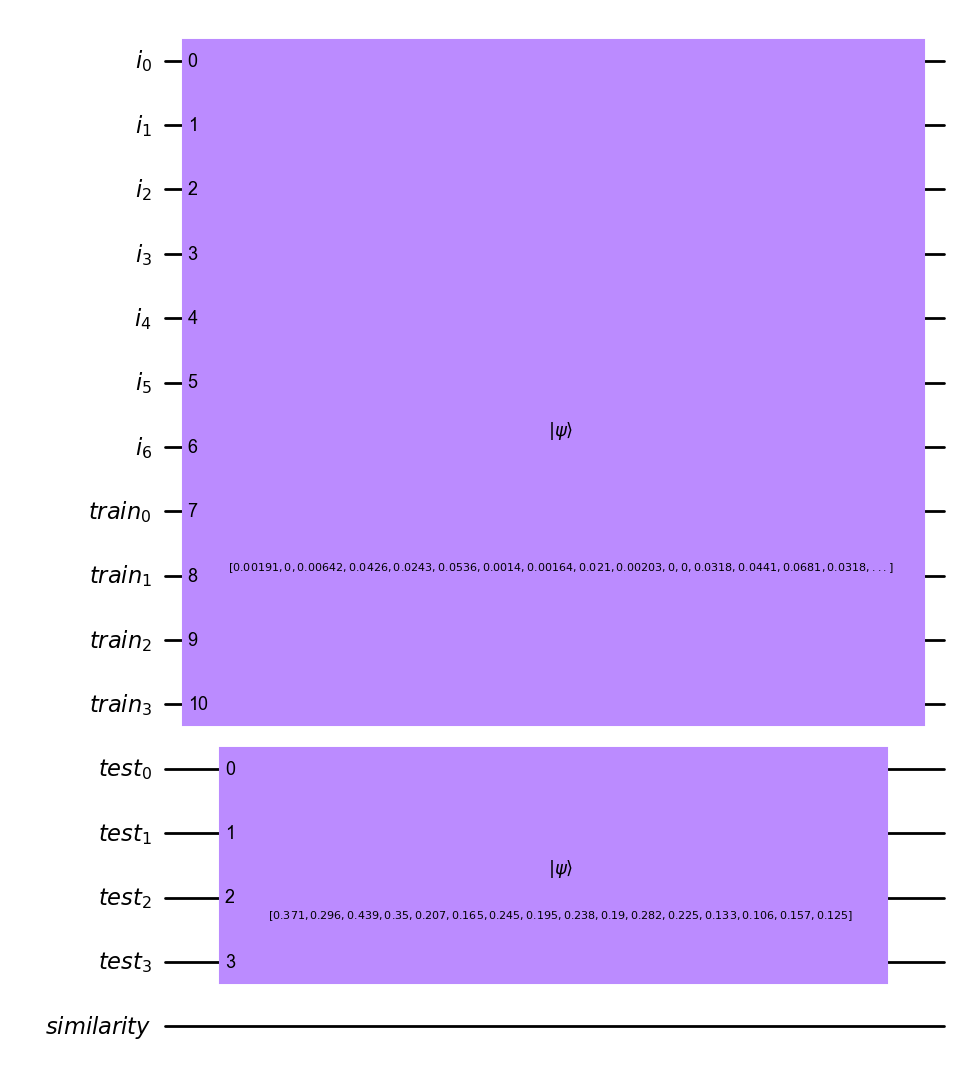

In [11]:
# Initialize the training register
qknn.initialize(psi, index_reg[0:N] + train_reg[0:M])

# Initialize the test register
qknn.initialize(phi, test_reg)

# Draw qknn
qknn.draw('mpl')

## Implementing Quantum SWAP Test on the Circuit

This cell introduces a critical component of the Quantum KNN classifier: the Quantum SWAP Test. The SWAP Test is a quantum algorithm used to estimate the similarity between two quantum states.

- **Importing the SWAP Test Module**:
  - The Quantum SWAP Test module is imported from a custom module named `modules`.
  - This indicates the use of a predefined function or circuit that implements the SWAP Test.

- **Applying the SWAP Test**:
  - The `swap_test` function/module, which presumably implements the Quantum SWAP Test algorithm, is appended to the `qknn` circuit.
  - It is applied to the first `M` qubits of both `train_reg` and `test_reg`, and the single qubit in the `p` register.
  - The `train_reg` and `test_reg` hold the quantum states of the training and test data, respectively, while `p` is used for measuring similarity.

- **Circuit Visualization (Post-SWAP Test)**:
  - The circuit `qknn` is visualized again with the 'mpl' style to show the inclusion of the SWAP Test.
  - This visualization allows us to verify the correct application of the SWAP Test within the circuit.

The Quantum SWAP Test is essential for the Quantum KNN classifier, as it provides a means to measure the similarity between the encoded test sample and each training sample, which forms the basis of the KNN classification.

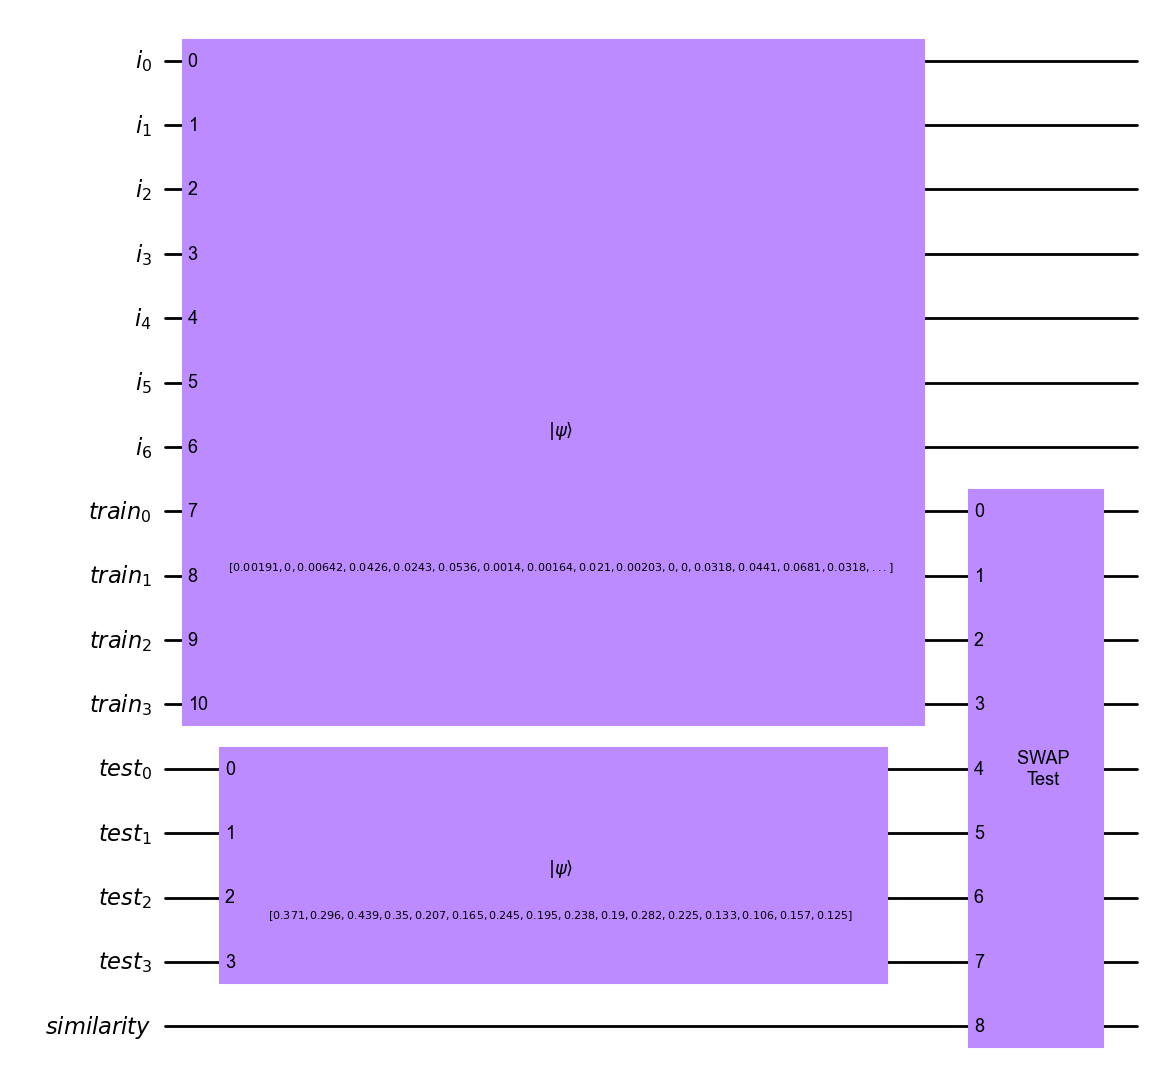

In [12]:
from modules import swap_test

# Apply the Quantum SWAP Test module to the quantum circuit
qknn.append(swap_test(M), train_reg[0:M] + test_reg[0:M] + [p[0]])
# Draw qknn
qknn.draw('mpl')

## Adding Classical Register and Measurements to the Circuit

This cell focuses on integrating a classical register into the Quantum KNN circuit and setting up measurements, a necessary step for extracting computational results from a quantum circuit.

- **Creating the Classical Register**:
  - A classical register `meas_reg` is created with length `meas_reg_len` (calculated as `N + 1`).
  - This register will hold the measurement outcomes from the quantum circuit.

- **Adding the Register to the Circuit**:
  - The newly created classical register is added to the `qknn` quantum circuit.

- **Setting Up Measurements**:
  - The `measure` method is used to measure the qubits in `index_reg` and `p` registers.
  - The results of these measurements will be stored in `meas_reg`.
  - Measuring `index_reg` is crucial for identifying which training data points are closest to the test data point.
  - The measurement of the `p` register will provide the outcome of the similarity estimation.

- **Circuit Visualization (Post-Measurement)**:
  - The circuit `qknn` is drawn again using Matplotlib with `fold = -1`, ensuring an extended view.
  - This visualization helps to confirm the correct setup of the measurement operations in the circuit.

The inclusion of measurements is vital in quantum computing as it allows us to observe the outcomes of the quantum operations, essential for interpreting the results of the Quantum KNN classification.

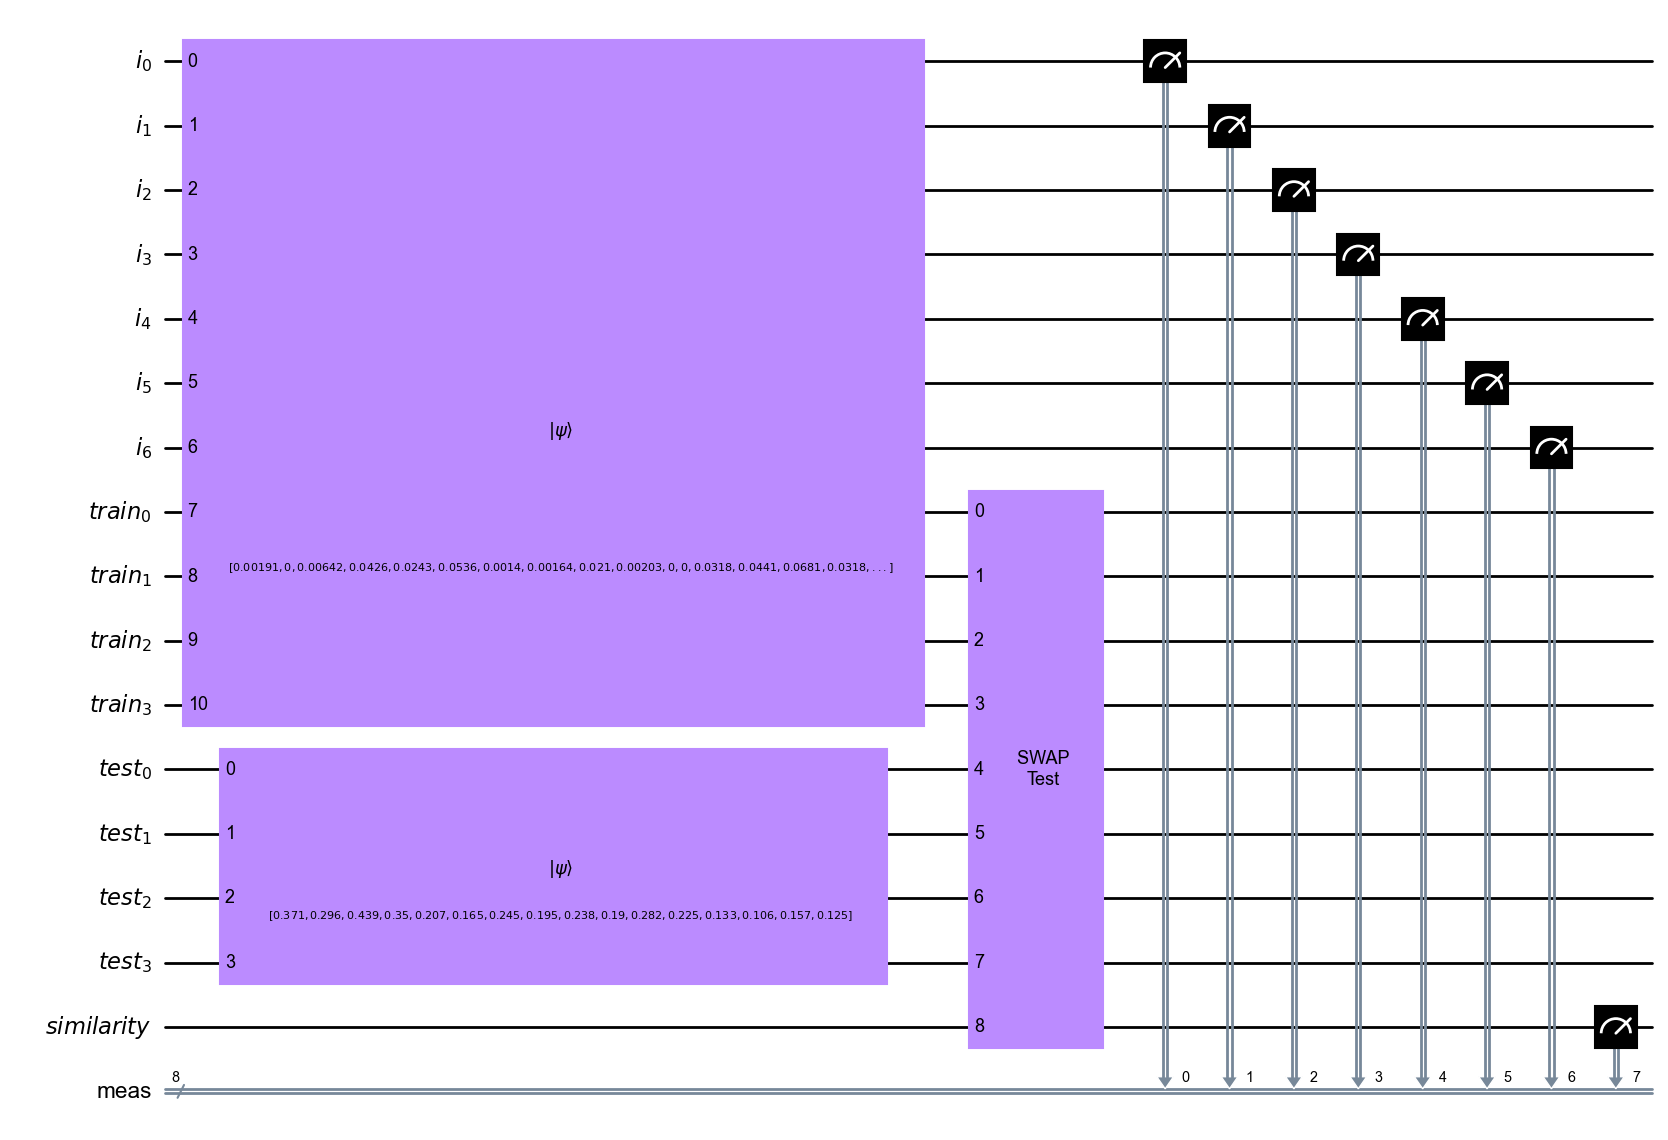

In [13]:
# Create the classical register
meas_reg_len = N + 1
meas_reg = ClassicalRegister(meas_reg_len, 'meas')
qknn.add_register(meas_reg)

# Measure the qubits
qknn.measure(index_reg[0::] + p[0::], meas_reg)

# Draw qknn
qknn.draw('mpl', fold = -1)

## Executing the Quantum Circuit and Retrieving Measurement Counts

This cell marks a pivotal stage in our Quantum KNN project where we execute the quantum circuit on a simulator and obtain the results of our computations.

- **Selecting the Backend**:
  - We select the `qasm_simulator` backend from Qiskit's `Aer` module.
  - This simulator enables us to run quantum circuits and mimic the behavior of an actual quantum computer.

- **Executing the Circuit**:
  - The `execute` function is used to run our `qknn` quantum circuit on the selected simulator.
  - We specify `shots = 15000`, indicating the number of times the circuit will be executed. This high number of shots ensures statistical significance in the measurement outcomes.

- **Retrieving Measurement Counts**:
  - The execution results are processed to obtain `counts_knn`, which holds the frequencies of each measurement outcome.
  - These counts represent how often each possible outcome (combination of qubit states) occurred over all the shots.

This step is crucial as it provides us with the empirical data needed to evaluate the performance of our Quantum KNN classifier. The counts from the measurements will be analyzed to determine the classification results based on the proximity of the test data to the training data in the quantum state space.

In [14]:
backend = Aer.get_backend('qasm_simulator')
counts_knn = execute(qknn, backend, shots = 15000).result().get_counts()

## Processing Measurement Counts for Classifier Results

In this cell, we delve into the post-execution phase of our Quantum KNN classifier, where the measurement counts are analyzed to extract meaningful classification information.

- **Initializing Results Array**:
  - We create a 2D NumPy array `result_arr` with dimensions `N_train` by 3. This array is initialized with zeros and is used to store the results of the quantum measurements.

- **Analyzing Measurement Counts**:
  - We iterate over each measurement outcome (`count`) in `counts_knn`.
  - For each outcome, we decode the training data point index (`i_dec`) from the binary string `count[1::]`.
  - The first bit of the count string (`count[0]`) indicates the phase (0 or 1).

- **Accumulating Results**:
  - If the phase is 0, we increment the corresponding entry in `result_arr[i_dec, 0]` by the frequency of that outcome (`counts_knn[count]`).
  - If the phase is 1, we increment `result_arr[i_dec, 1]` similarly.
  - This process distinguishes between the two possible outcomes of the SWAP test, accumulating the counts separately.

The analysis of these measurement counts is essential for determining the similarity between the test sample and each of the training samples. The accumulated results in `result_arr` will later be used to identify the nearest neighbors and classify the test sample accordingly.

In [15]:
result_arr = np.zeros((N_train, 3))
for count in counts_knn:
    i_dec = int(count[1::], 2)
    phase = int(count[0], 2)
    if phase == 0:
        result_arr[i_dec, 0] += counts_knn[count]
    else:
        result_arr[i_dec, 1] += counts_knn[count]

## Calculating Probabilities for Classification Decision

This cell focuses on further analyzing the results from our Quantum KNN classifier by calculating a specific probability for each training data point, which will assist in making the final classification decision.

- **Probability Calculation**:
  - For each training data point `i` (up to `N_train`), we calculate the probability of the phase being 1 (`prob_1`).
  - This probability is calculated as the ratio of counts corresponding to phase 1 (`result_arr[i][1]`) to the total counts for both phases (0 and 1).
  - It represents the likelihood of the test sample being similar to the training sample `i`.

- **Updating the Results Array**:
  - The third column of `result_arr` (`result_arr[i][2]`) is updated with the value `1 - 2*prob_1`.
  - This calculation transforms the probability into a metric that will be used for classification.
  - The transformation `1 - 2*prob_1` is likely a measure of similarity or distance, with values closer to 1 indicating greater similarity.

This step is crucial in the Quantum KNN classifier as it translates the quantum measurement outcomes into a classical metric that can be used to determine the nearest neighbors of the test sample, thereby enabling classification based on the majority label of these neighbors.

In [16]:
for i in range(N_train):        
    prob_1 = result_arr[i][1]/(result_arr[i][0] + result_arr[i][1])
    result_arr[i][2] = 1 - 2*prob_1

## Identifying Nearest Neighbors and Classifying Test Sample

In this cell, we reach the culmination of our Quantum KNN classifier's process: identifying the nearest neighbors of the test sample and determining its class based on these neighbors.

- **Selecting Nearest Neighbors**:
  - We set `k` to 10, specifying the number of nearest neighbors to consider.
  - The `argsort` function is applied to the similarity/distances in `result_arr[:, 2]` to get the indices of the samples in descending order of similarity (or ascending order of distance).
  - The first `k` indices (`k_min_dist_arr`) represent the nearest neighbors of the test sample.

- **Class Prediction**:
  - The predicted class of the test sample (`y_pred`) is determined using the `mode` function, which identifies the most frequent class among the `k` nearest neighbors (`y_train[k_min_dist_arr]`).

- **Comparison with Expected Class**:
  - `y_exp` holds the actual class of the test sample (`y_test[test_index]`) for comparison.
  - The predicted and expected classes are printed out, allowing us to evaluate the classifier's performance on this particular test sample.

This step is the key to the KNN classifier, where the principle of "majority voting" among nearest neighbors is applied to classify a new data point. It demonstrates the utility of quantum computing in enhancing traditional machine learning algorithms.

In [17]:
# Find the indexes of minimum distance
k = 10
k_min_dist_arr = result_arr[:, 2].argsort()[::-1][:k]

# Determine the class of the test sample
y_pred = mode(y_train[k_min_dist_arr])
y_exp = y_test[test_index]
print('Predicted class of the test sample is {}.'.format(y_pred))
print('Expected class of the test sample is {}.'.format(y_exp))

Predicted class of the test sample is 2.
Expected class of the test sample is 2.


## Defining Quantum KNN Module and Evaluating Model Accuracy

This final cell encapsulates the entire Quantum KNN process in a function and evaluates the classifier's performance across the test dataset.

- **Quantum KNN Module (`q_knn_module`)**:
  - The function `q_knn_module` is defined to implement the Quantum KNN classifier for a given test sample index `test_index` and the quantum state `psi` encoding the training data.
  - It follows the steps previously executed individually: encoding the test sample into a quantum state, initializing quantum registers, applying the swap test, executing the circuit, and processing the results.
  - The function returns the predicted and expected classes for the given test sample.

- **Applying the Function on Test Data**:
  - We iterate over each test sample in `X_test`, applying `q_knn_module` to obtain the predicted (`y_pred`) and expected (`y_exp`) classes.
  - These classes are collected in `y_pred_arr` and `y_exp_arr`.

- **Calculating Model Accuracy**:
  - The model's accuracy is calculated by comparing the predicted and expected classes for each test sample.
  - We count the number of true (correct) predictions `t` and false (incorrect) predictions `f`.
  - The accuracy is then calculated as the percentage of true predictions out of the total and printed.

This comprehensive function and accuracy evaluation provide a holistic view of the Quantum KNN classifier's performance, demonstrating its effectiveness in classifying data using quantum computing principles.

In [18]:
def q_knn_module(test_index, psi, k=10):
    phi_test = X_test[test_index]

    # Create the encoded feature vector
    for i in range(M):
        phi_i = [np.sqrt(phi_test[i]), np.sqrt(1- phi_test[i])]
        if i == 0:
            phi = phi_i
        else:
            phi = np.kron(phi, phi_i)    

    # Create the quantum circuit
    qknn = QuantumCircuit()

    # Add registers to circuit
    qknn.add_register(index_reg)
    qknn.add_register(train_reg)
    qknn.add_register(test_reg)
    qknn.add_register(p)

    # Initialize train reg
    qknn.initialize(psi, index_reg[0:N] + train_reg[0:M])

    # Initialize test reg
    qknn.initialize(phi, test_reg)

    # Apply the swap test module to the quantum circuit
    qknn.append(swap_test(M), train_reg[0:M] + test_reg[0:M] + [p[0]])

    # Create the classical register
    meas_reg_len = N+1
    meas_reg = ClassicalRegister(meas_reg_len, 'meas')
    qknn.add_register(meas_reg)

    # Measure the qubits
    qknn.measure(index_reg[0::] + p[0::], meas_reg)

    # Circuit execution
    backend = Aer.get_backend('qasm_simulator')
    counts_knn = execute(qknn, backend, shots = 10000).result().get_counts()

    # Decoding the results
    result_arr = np.zeros((N_train, 3))
    for count in counts_knn:
        i_dec = int(count[1::], 2)
        phase = int(count[0], 2)
        if phase == 0:
            result_arr[i_dec, 0] += counts_knn[count]
        else:
            result_arr[i_dec, 1] += counts_knn[count]

    # Computing similarity
    for i in range(N_train):        
        prob_1 = result_arr[i][1]/(result_arr[i][0] + result_arr[i][1])
        result_arr[i][2] = 1 - 2*prob_1

    # Find the indices of minimum distance
    k_min_dist_arr = result_arr[:, 2].argsort()[::-1][:k]

    # Determine the class of the test sample
    y_pred = mode(y_train[k_min_dist_arr])
    y_exp = y_test[test_index]

    return y_pred, y_exp
 
y_pred_arr = []
y_exp_arr = [] 

for test_indx in range(len(X_test)):
    y_pred, y_exp = q_knn_module(test_indx, psi)
    y_pred_arr.append(y_pred)
    y_exp_arr.append(y_exp)

t = 0
f = 0
for i in range(len(X_test)):
    if y_pred_arr[i] == y_exp_arr[i]:
        t += 1
    else:
        f += 1

print('Model accuracy is {}%.'.format(t/(t+f) *100))

Model accuracy is 62.0%.
